### **Algoritmos de búsqueda en grafos: DFS y BFS**


Los grafos son estructuras de datos que representan relaciones entre objetos. Estos objetos son llamados nodos o vértices, y las relaciones entre ellos son llamadas aristas. El análisis de grafos es una rama fundamental de la informática que se utiliza para resolver una gran variedad de problemas en distintos campos, desde la biología hasta la logística.

Dentro del análisis de grafos, los algoritmos de búsqueda son muy importantes. Permiten encontrar caminos entre nodos en un grafo, lo que tiene aplicaciones muy diversas. Entre los algoritmos de búsqueda más comunes se encuentran **DFS (Depth-First Search)** y BFS **(Breadth-First Search)**.

1. **DFS** trabaja recursivamente y va "profundizando" en un camino del grafo antes de avanzar a otros caminos.
2. **BFS** examina todos los nodos a una distancia dada antes de avanzar a los nodos a una distancia mayor.

Ambos algoritmos tienen sus fortalezas y debilidades dependiendo de la tarea que se quiera realizar. 
- **DFS** es útil cuando se busca una solución en profundidad, lo que puede ser útil en problemas que tengan múltiples soluciones en diferentes niveles del grafo.
- **BFS** es ideal para encontrar la solución más corta o una solución cercana al nodo objetivo.

1. La Búsqueda en Profundidad (DFS) comienza en un vértice y explora cada uno de sus vértices adyacentes. Si alguno de estos vértices no ha sido visitado, se aplica el algoritmo recursivamente sobre él. Este proceso continúa hasta que se encuentra el objetivo deseado o se visitan todos los vértices del grafo. DFS se caracteriza por ir más profundo en el grafo antes de regresar a visitar otros vértices.

2. La Búsqueda en Anchura (BFS) también comienza desde un nodo y explora todos los nodos adyacentes antes de continuar con los nodos adyacentes de esos nodos. Es decir, se visita cada nivel del grafo a la vez, comenzando desde el nodo raíz, luego sus hijos directos, luego los hijos de esos hijos, y así sucesivamente. BFS se caracteriza por ir más ancho en el grafo antes de profundizar.

_Ambos algoritmos son eficaces para diferentes tipos de problemas en los grafos: **DFS es útil para detectar ciclos, mientras que BFS es útil para encontrar la distancia más corta entre dos nodos**. Es importante mencionar que ambos algoritmos tienen una complejidad de tiempo lineal en relación con el número de vértices del grafo._

> Para ver de forma animada: https://medium.com/@dillihangrae/searching-in-ai-dfs-bfs-7417d34e8113  
> Para entender mejor: https://asimov.cloud/blog/programacion-5/algoritmos-dfs-y-bfs-en-un-grafo-199

In [1]:
# Librerías
# ======================================================================================
import networkx as nx
import pandas as pd
import numpy as np
import networkx.algorithms.community as nx_comm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import itertools
import matplotlib.cm as cm

In [12]:
# Datos
# ======================================================================================
#### > Agregar código

### **Algoritmo de Búsqueda en Profundidad (DFS)**

El algoritmo de búsqueda en profundidad (DFS) explora los vértices de un grafo en un orden específico, profundizando en cada rama del grafo antes de retroceder. Desde una perspectiva matemática, DFS puede describirse y analizarse en términos de estructuras de grafos y propiedades matemáticas.

**_Definición Matemática_**

Dado un grafo $G = (V,E)$, donde $V$ es el conjunto de vértices y $E$ es el conjunto de aristas, DFS se define como sigue:

1. **Vértice Inicial**: Se selecciona un vértice inicial $v \in V$

2. **Recorrido**: Se exploran los vértices alcanzables desde 
 siguiendo las aristas. Para cada vértice 
 visitado, se exploran todos los vértices adyacentes que aún no han sido visitados antes de retroceder.

_**Propiedades Matemáticas**_

1. **Complejidad Temporal**: La complejidad temporal del algoritmo DFS es $O(V+E)$, donde $V$ es el número de vértices y $E$ es el número de aristas. Esto se debe a que el algoritmo visita cada vértice y cada arista al menos una vez.

3. **Complejidad Espacial**: La complejidad espacial de DFS es $O(V)$, ya que el algoritmo necesita espacio para almacenar el conjunto de vértices visitados y la estructura de datos utilizada para manejar el recorrido (como una pila o recursión).

4. **Árbol de Búsqueda**: Durante la ejecución de DFS, se puede construir un árbol de búsqueda que muestra cómo los vértices están conectados según el orden en que se visitaron. Los vértices del grafo se organizan en niveles basados en la profundidad de la búsqueda.

5. **Ciclos**: DFS puede detectar ciclos en un grafo. Si durante el recorrido se encuentra un vértice que ya está en la pila de exploración (es decir, que se está explorando actualmente), se detecta un ciclo.

6. **Conectividad**: DFS puede identificar componentes conectadas en un grafo no dirigido. Si se inicia DFS en un vértice y visita todos los vértices alcanzables, los vértices visitados forman una componente conectada.

7. **Recorrido**: El recorrido producido por DFS puede ser descrito como una secuencia de vértices en el orden en que se visitan. Este recorrido refleja la estructura de profundidad del grafo a partir del vértice inicial.

Estas propiedades matemáticas hacen que DFS sea una herramienta poderosa para analizar y explorar grafos, ofreciendo una comprensión detallada de su estructura y conectividad.

In [3]:
# Creación de la red
# ======================================================================================
G = nx.from_pandas_edgelist(df = network,
                            source = 'from',
                            target = 'to',
                            edge_attr = ['weight'])

In [4]:
# Selección del Nodo raíz para BFS, DFS
# ====================================================================================== 
root_node = 34

# Posición fija para todas las gráficas
# Posición común
pos = nx.spring_layout(G, seed=42)

# Tamaños y colores base
nodes_size = [150 * G.degree[node] for node in G.nodes()]
nodes_color = ['lightgrey' for _ in G.nodes()]

# Paleta de colores
color_map = plt.colormaps.get_cmap('tab10')


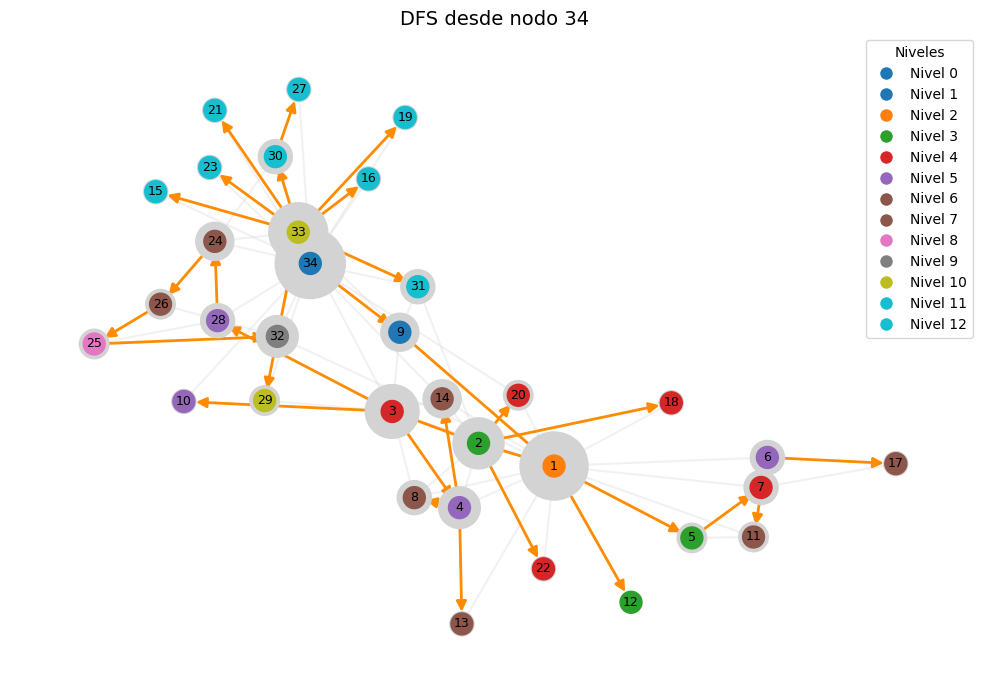

In [5]:
# DFS Tree
# Árbol DFS desde root_node
dfs_tree = nx.dfs_tree(G, source=root_node)
levels_dfs = dict(nx.single_source_shortest_path_length(dfs_tree, root_node))
max_level = max(levels_dfs.values())
node_colors = [color_map(levels_dfs[n]/max_level) for n in dfs_tree.nodes()]

fig, ax = plt.subplots(figsize=(10, 7))
nx.draw_networkx_nodes(G, pos, node_size=nodes_size, node_color=nodes_color, ax=ax)
nx.draw_networkx_edges(G, pos, edge_color='lightgrey', width=1.5, alpha=0.3, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, ax=ax)
nx.draw_networkx_nodes(dfs_tree, pos, node_color=node_colors, node_size=250, ax=ax)
nx.draw_networkx_edges(dfs_tree, pos, edge_color='darkorange', width=2, arrows=True, arrowstyle='-|>', arrowsize=15, ax=ax)

legend_elements = []
for lvl in sorted(set(levels_dfs.values())):
    color = color_map(lvl / max_level)
    legend_elements.append(Line2D([0], [0], marker='o', color='w',
                                  label=f'Nivel {lvl}', markerfacecolor=color, markersize=10))
ax.legend(handles=legend_elements, title="Niveles", loc='upper right')
ax.set_title(f"DFS desde nodo {root_node}", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()




In [6]:
levels_dfs

{34: 0,
 9: 1,
 1: 2,
 2: 3,
 5: 3,
 12: 3,
 3: 4,
 18: 4,
 20: 4,
 22: 4,
 7: 4,
 4: 5,
 10: 5,
 28: 5,
 6: 5,
 8: 6,
 13: 6,
 14: 6,
 24: 6,
 11: 6,
 17: 6,
 26: 7,
 25: 8,
 32: 9,
 29: 10,
 33: 10,
 15: 11,
 16: 11,
 19: 11,
 21: 11,
 23: 11,
 30: 11,
 31: 11,
 27: 12}

### **Algoritmo de Búsqueda en Anchura (BFS)**

El algoritmo de búsqueda en anchura (BFS) es un método para explorar los vértices de un grafo en un orden específico, visitando todos los vértices al mismo nivel antes de avanzar al siguiente nivel. Desde una perspectiva matemática, BFS se basa en la teoría de grafos y utiliza conceptos relacionados con la estructura de los grafos para realizar la exploración.

_**Definición Matemática**_

Dado un grafo $G = (V,E)$, donde $V$ es el conjunto de vértices y $E$ es el conjunto de aristas, DFS se define como sigue:

1. **Vértice Inicial**: Se selecciona un vértice inicial $v \in V$

2. Recorrido: Se exploran los vértices alcanzables desde $v$ en niveles. Primero se visitan todos los vértices a una distancia de 1 desde, luego los vértices a una distancia de 2, y así sucesivamente.

_**Propiedades Matemáticas**_

1. **Complejidad Temporal**: La complejidad temporal del algoritmo BFS es $O(V+E)$, donde $V$ es el número de vértices y $E$ es el número de aristas. Esto se debe a que BFS visita cada vértice y cada arista al menos una vez durante el proceso de exploración.

2. **Complejidad Espacial**:La complejidad espacial de BFS es $O(V)$ debido al espacio necesario para almacenar la estructura de datos utilizada para gestionar el recorrido (como una cola) y el conjunto de vértices visitados.

3. **Árbol de Búsqueda**: Durante la ejecución de BFS, se puede construir un árbol de búsqueda que muestra cómo los vértices están conectados según el orden en que se visitaron. Este árbol refleja la estructura de niveles del grafo a partir del vértice inicial.

4. **Caminos más Cortos**: En un grafo no ponderado, BFS encuentra el camino más corto en términos de número de aristas entre el vértice inicial y cualquier otro vértice alcanzable. Esto se debe a que BFS explora los vértices en niveles, garantizando que el primer camino encontrado a un vértice sea el más corto en términos de número de aristas.

5. **Componentes Conectadas**: BFS puede identificar componentes conectadas en un grafo no dirigido. Si se inicia BFS en un vértice y visita todos los vértices alcanzables, los vértices visitados forman una componente conectada. Para encontrar todas las componentes conectadas, se puede repetir BFS para cada vértice no visitado.

6. **Recorrido**: El recorrido producido por BFS puede ser descrito como una secuencia de vértices en el orden en que se visitan, nivel por nivel. Este recorrido refleja la estructura de anchura del grafo a partir del vértice inicial.

Estas propiedades matemáticas hacen que BFS sea una herramienta fundamental para analizar y explorar grafos, proporcionando una visión clara de la estructura de niveles y las distancias en el grafo.

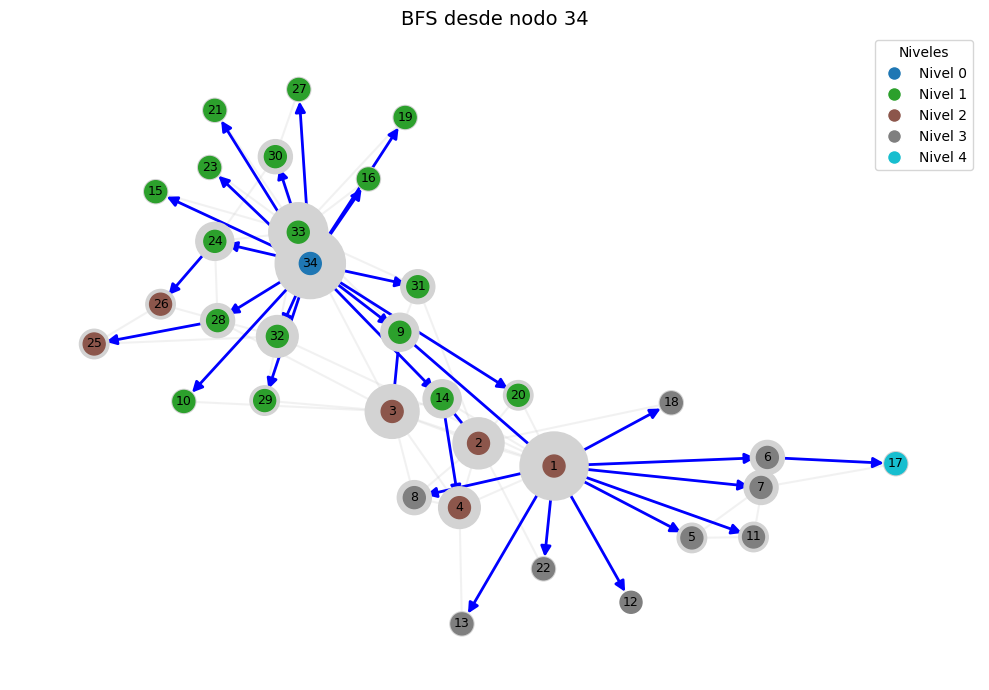

In [7]:
# BFS Tree
# Árbol BFS desde root_node
bfs_tree = nx.bfs_tree(G, source=root_node)
levels_bfs = dict(nx.single_source_shortest_path_length(bfs_tree, root_node))
max_level = max(levels_bfs.values())
color_map = plt.colormaps.get_cmap('tab10')
node_colors = [color_map(levels_bfs[n]/max_level) for n in bfs_tree.nodes()]

# Dibujar
fig, ax = plt.subplots(figsize=(10, 7))
nx.draw_networkx_nodes(G, pos, node_size=nodes_size, node_color=nodes_color, ax=ax)
nx.draw_networkx_edges(G, pos, edge_color='lightgrey', width=1.5, alpha=0.3, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, ax=ax)
nx.draw_networkx_nodes(bfs_tree, pos, node_color=node_colors, node_size=250, ax=ax)
nx.draw_networkx_edges(bfs_tree, pos, edge_color='blue', width=2, arrows=True, arrowstyle='-|>', arrowsize=15, ax=ax)

# Leyenda por nivel
legend_elements = []
for lvl in sorted(set(levels_bfs.values())):
    color = color_map(lvl / max_level)
    legend_elements.append(Line2D([0], [0], marker='o', color='w',
                                  label=f'Nivel {lvl}', markerfacecolor=color, markersize=10))
ax.legend(handles=legend_elements, title="Niveles", loc='upper right')
ax.set_title(f"BFS desde nodo {root_node}", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()



In [8]:
levels_bfs

{34: 0,
 9: 1,
 10: 1,
 14: 1,
 15: 1,
 16: 1,
 19: 1,
 20: 1,
 21: 1,
 23: 1,
 24: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 1: 2,
 3: 2,
 2: 2,
 4: 2,
 26: 2,
 25: 2,
 5: 3,
 6: 3,
 7: 3,
 8: 3,
 11: 3,
 12: 3,
 13: 3,
 18: 3,
 22: 3,
 17: 4}

### **Algoritmo de árbol de expansión mínimo (MST) de Kruskal**

Un árbol de expansión mínima (MST) es un subconjunto de las aristas de un grafo conexo y ponderado por aristas, que conecta todos los vértices sin ciclos y con el mínimo peso total de aristas posible.

En teoría de grafos, un árbol de expansión mínimo (MST) de un grafo ponderado, conexo y no dirigido es un subconjunto de sus aristas que conecta todos los vértices sin ningún ciclo y tiene el peso de arista total mínimo posible.

El MST se utiliza para garantizar un costo de conexión mínimo entre todos los nodos de una red, lo que resulta útil en aplicaciones como diseño de redes, diseño de circuitos y agrupamiento.


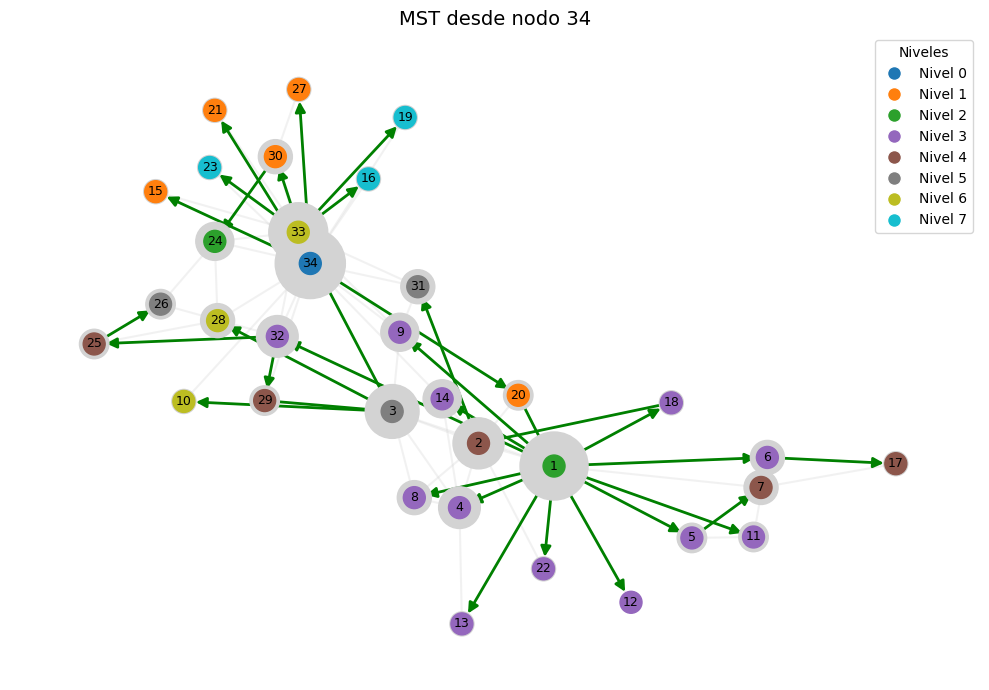

In [9]:
# Árbol de expansión mínima
# Árbol MST → dirigido desde root_node para jerarquía
mst_undirected = nx.minimum_spanning_tree(G, weight='weight')
mst_tree = nx.bfs_tree(mst_undirected, source=root_node)
levels_mst = dict(nx.single_source_shortest_path_length(mst_tree, root_node))
max_level = max(levels_mst.values())
node_colors = [color_map(levels_mst[n]/max_level) for n in mst_tree.nodes()]

fig, ax = plt.subplots(figsize=(10, 7))
nx.draw_networkx_nodes(G, pos, node_size=nodes_size, node_color=nodes_color, ax=ax)
nx.draw_networkx_edges(G, pos, edge_color='lightgrey', width=1.5, alpha=0.3, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, ax=ax)
nx.draw_networkx_nodes(mst_tree, pos, node_color=node_colors, node_size=250, ax=ax)
nx.draw_networkx_edges(mst_tree, pos, edge_color='green', width=2, arrows=True, arrowstyle='-|>', arrowsize=15, ax=ax)

legend_elements = []
for lvl in sorted(set(levels_mst.values())):
    color = color_map(lvl / max_level)
    legend_elements.append(Line2D([0], [0], marker='o', color='w',
                                  label=f'Nivel {lvl}', markerfacecolor=color, markersize=10))
ax.legend(handles=legend_elements, title="Niveles", loc='upper right')
ax.set_title(f"MST desde nodo {root_node}", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()



In [10]:
levels_mst

{34: 0,
 20: 1,
 21: 1,
 15: 1,
 27: 1,
 30: 1,
 1: 2,
 24: 2,
 13: 3,
 8: 3,
 9: 3,
 11: 3,
 18: 3,
 22: 3,
 32: 3,
 4: 3,
 5: 3,
 6: 3,
 12: 3,
 14: 3,
 2: 4,
 25: 4,
 29: 4,
 7: 4,
 17: 4,
 31: 5,
 26: 5,
 3: 5,
 10: 6,
 28: 6,
 33: 6,
 19: 7,
 23: 7,
 16: 7}

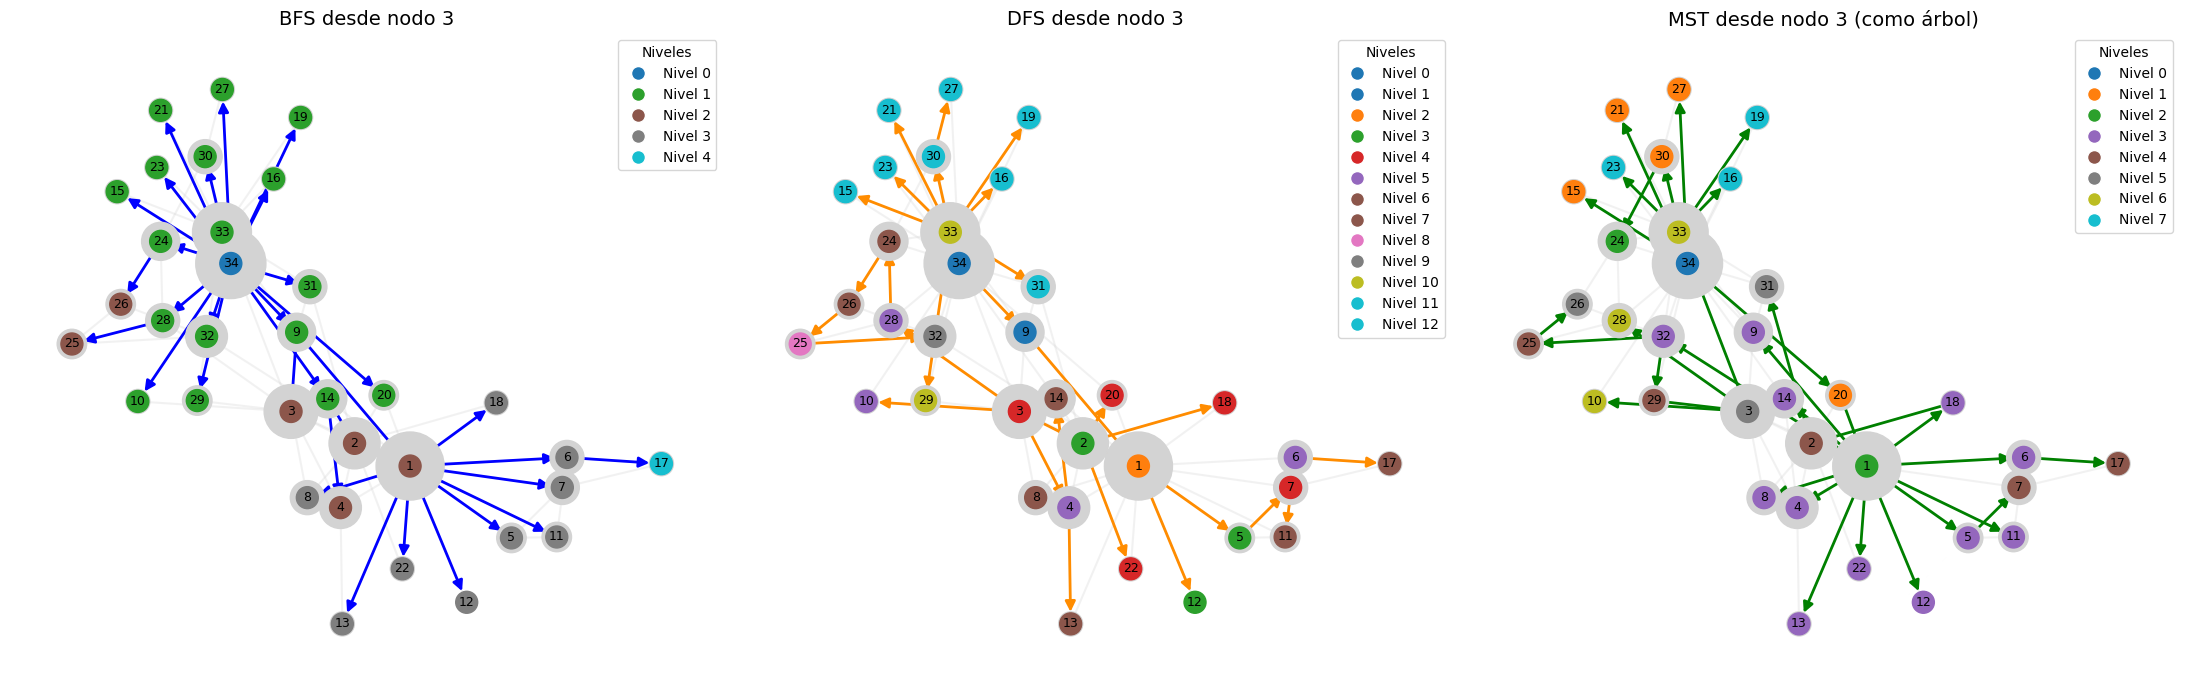

In [11]:
# Crear árboles
trees = {
    "BFS desde nodo 3": nx.bfs_tree(G, source=root_node),
    "DFS desde nodo 3": nx.dfs_tree(G, source=root_node),
    "MST desde nodo 3 (como árbol)": nx.bfs_tree(nx.minimum_spanning_tree(G, weight='weight'), source=root_node)
}

# Crear figura
fig, axs = plt.subplots(1, 3, figsize=(22, 7))

for ax, (title, tree) in zip(axs, trees.items()):
    # Calcular niveles
    levels = nx.single_source_shortest_path_length(tree, root_node)
    max_level = max(levels.values())
    
    # Colores por nodo
    node_colors = [color_map(levels[n] / max_level) for n in tree.nodes()]
    
    # Dibujar red base
    nx.draw_networkx_nodes(G, pos, node_size=nodes_size, node_color=nodes_color, ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color='lightgrey', width=1.5, alpha=0.3, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=9, ax=ax)

    # Dibujar árbol
    edge_color = 'blue' if 'BFS' in title else 'darkorange' if 'DFS' in title else 'green'
    nx.draw_networkx_nodes(tree, pos, node_color=node_colors, node_size=250, ax=ax)
    nx.draw_networkx_edges(tree, pos, edge_color=edge_color, width=2,
                           arrows=True, arrowstyle='-|>', arrowsize=15, ax=ax)
    
    # Crear leyenda de niveles (color por nivel)
    legend_elements = []
    unique_levels = sorted(set(levels.values()))
    for lvl in unique_levels:
        color = color_map(lvl / max_level)
        legend_elements.append(Line2D([0], [0], marker='o', color='w',
                                      label=f'Nivel {lvl}',
                                      markerfacecolor=color, markersize=10))
    
    ax.legend(handles=legend_elements, title="Niveles", loc='upper right')
    ax.set_title(title, fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()